#CS465 Data Analysis Project
## Saudi Arabia Tamimi supermarket data analysis
7 phases

Nouf Almojel
222410007



In [ ]:
# Saudi Arabia Supermarket Data Analysis
#Phase 1- Project Kickoff
# code covering Data Preparation, EDA, and Feature Engineering

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression

# Set visualization style
plt.style.use('seaborn-v0_8')
sns.set_palette('viridis')

In [ ]:
# ------------------------------------------------
# Phase 1- Project kickoff
# ------------------------------------------------
print("Phase 1- Project kickoff")

# Load the dataset
try:
    df = pd.read_csv('tamimimarkets.csv')
    print(f"Successfully loaded tamimimarkets.csv")
except FileNotFoundError:
    print(f"Error: File not found. Please check the file path.")
    exit()
except Exception as e:
    print(f"Error loading data: {e}")
    exit()

# Display basic information
print("\nDataset Overview:")
print(f"Number of records: {len(df)}")
print(f"Columns: {', '.join(df.columns)}")
print("\nFirst 5 records:")
print(df.head())

# Basic data information
print("\nData Types:")
print(df.dtypes)

print("\nSummary Statistics:")
print(df.describe())


Phase 1- Project kickoff
Successfully loaded tamimimarkets.csv

Dataset Overview:
Number of records: 1220
Columns: Unnamed: 0, Company, Product, Size, Currency, Prices

First 5 records:
   Unnamed: 0            Company                       Product    Size  \
0           0             Goody       Whole Kernel Golden Corn    340G   
1           1             Goody            Original Mayonnaise  332 Ml   
2           2             Goody                 Ranch Dressing  237 Ml   
3           3  Halwani Brothers   AlNakhla Finest Halawa Plain    250G   
4           4              7 UP                            Can  150 Ml   

  Currency  Prices  
0      SAR    3.25  
1      SAR    7.75  
2      SAR    7.95  
3      SAR    9.40  
4      SAR    1.50  

Data Types:
Unnamed: 0      int64
Company        object
Product        object
Size           object
Currency       object
Prices        float64
dtype: object

Summary Statistics:
        Unnamed: 0       Prices
count  1220.000000  1220.000000

In [ ]:
# ------------------------------------------------
# Phase 2: Data Preparation
# ------------------------------------------------
print("\n\nPhase 2: Data Preparation")

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing values per column:")
print(missing_values)

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate records: {duplicates}")
if duplicates > 0:
    df = df.drop_duplicates()
    print(f"Duplicates removed. New dataset size: {len(df)}")

# Ensure Prices is numeric
if df['Prices'].dtype == 'object':
    df['Prices'] = pd.to_numeric(df['Prices'], errors='coerce')
    if df['Prices'].isnull().sum() > 0:
        print(f"Warning: {df['Prices'].isnull().sum()} price values couldn't be converted to numeric")
        df['Prices'] = df['Prices'].fillna(df['Prices'].median())

# Extract size values and units
def extract_size_value(size_str):
    match = re.search(r'(\d+\.?\d*)', str(size_str))
    if match:
        return float(match.group(1))
    return np.nan

def extract_size_unit(size_str):
    match = re.search(r'([A-Za-z]+)', str(size_str))
    if match:
        return match.group(1).upper()
    return None

# Extract size values and units
df['Size_Value'] = df['Size'].apply(extract_size_value)
df['Size_Unit'] = df['Size'].apply(extract_size_unit)

# Convert all units to a standard (grams)
unit_conversion = {
    'G': 1, 'KG': 1000, 'ML': 1, 'L': 1000
}

df['Size_Standardized'] = df.apply(
    lambda row: row['Size_Value'] * unit_conversion.get(row['Size_Unit'], 1)
    if not pd.isna(row['Size_Value']) and not pd.isna(row['Size_Unit']) else np.nan,
    axis=1
)

# Handle any missing standardized sizes
if df['Size_Standardized'].isnull().sum() > 0:
    print(f"Warning: {df['Size_Standardized'].isnull().sum()} size values couldn't be standardized")
    df['Size_Standardized'] = df['Size_Standardized'].fillna(df['Size_Standardized'].median())

print("\nAfter preprocessing - dataset preview:")
print(df.head())



Phase 2: Data Preparation

Missing values per column:
Unnamed: 0    0
Company       0
Product       0
Size          0
Currency      0
Prices        0
dtype: int64

Number of duplicate records: 0

After preprocessing - dataset preview:
   Unnamed: 0            Company                       Product    Size  \
0           0             Goody       Whole Kernel Golden Corn    340G   
1           1             Goody            Original Mayonnaise  332 Ml   
2           2             Goody                 Ranch Dressing  237 Ml   
3           3  Halwani Brothers   AlNakhla Finest Halawa Plain    250G   
4           4              7 UP                            Can  150 Ml   

  Currency  Prices  Size_Value Size_Unit  Size_Standardized  
0      SAR    3.25       340.0         G              340.0  
1      SAR    7.75       332.0        ML              332.0  
2      SAR    7.95       237.0        ML              237.0  
3      SAR    9.40       250.0         G              250.0  
4      S



Phase 3: Exploratory Data Analysis


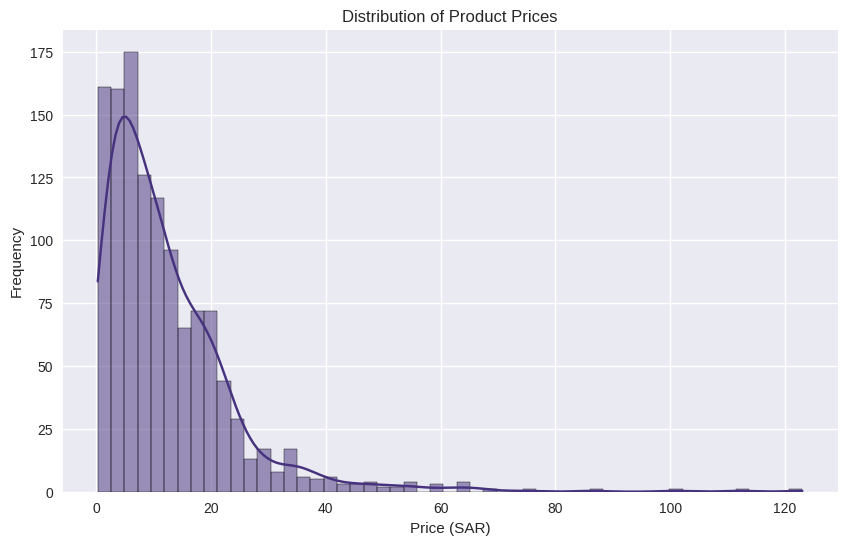

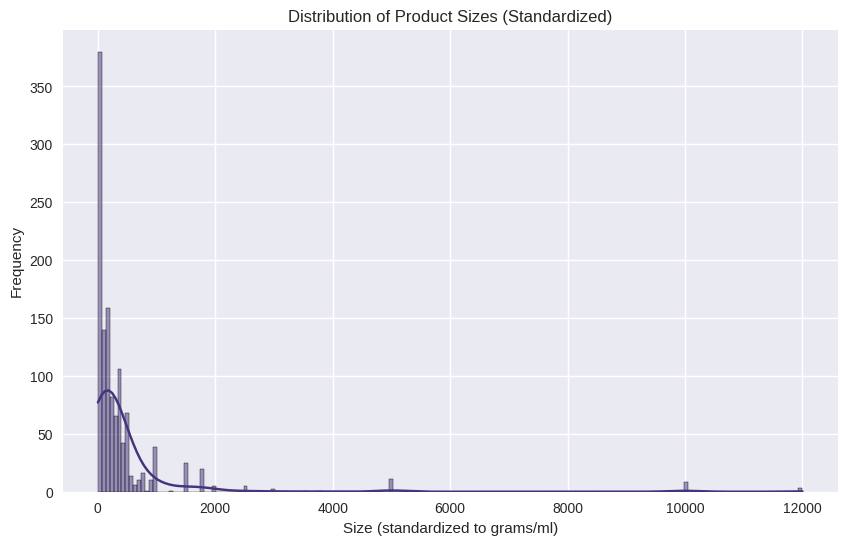

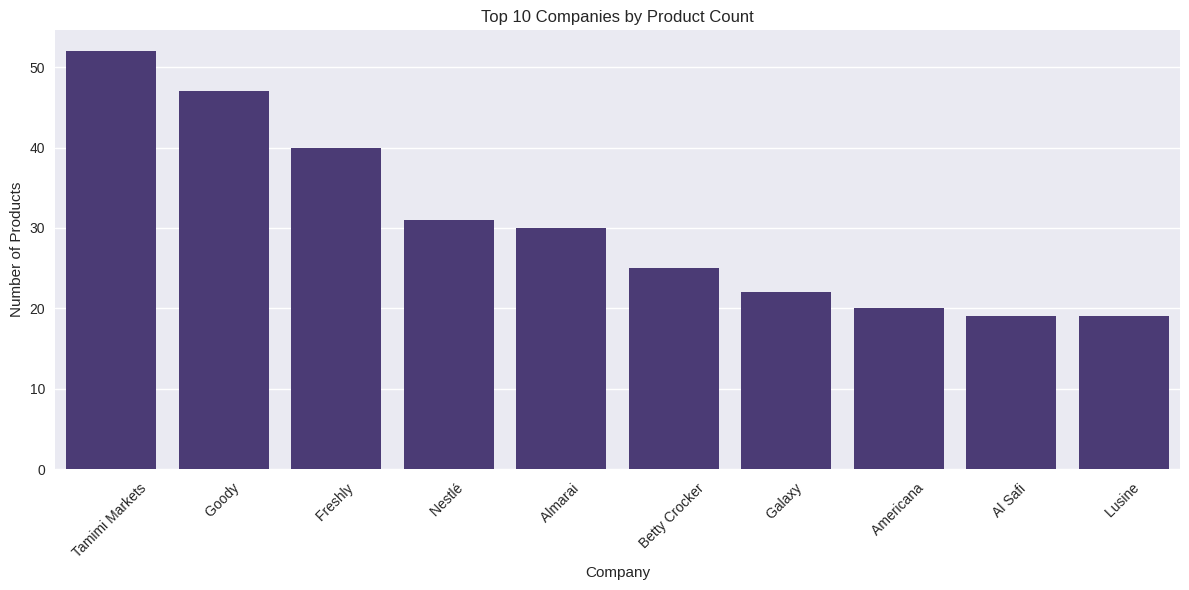

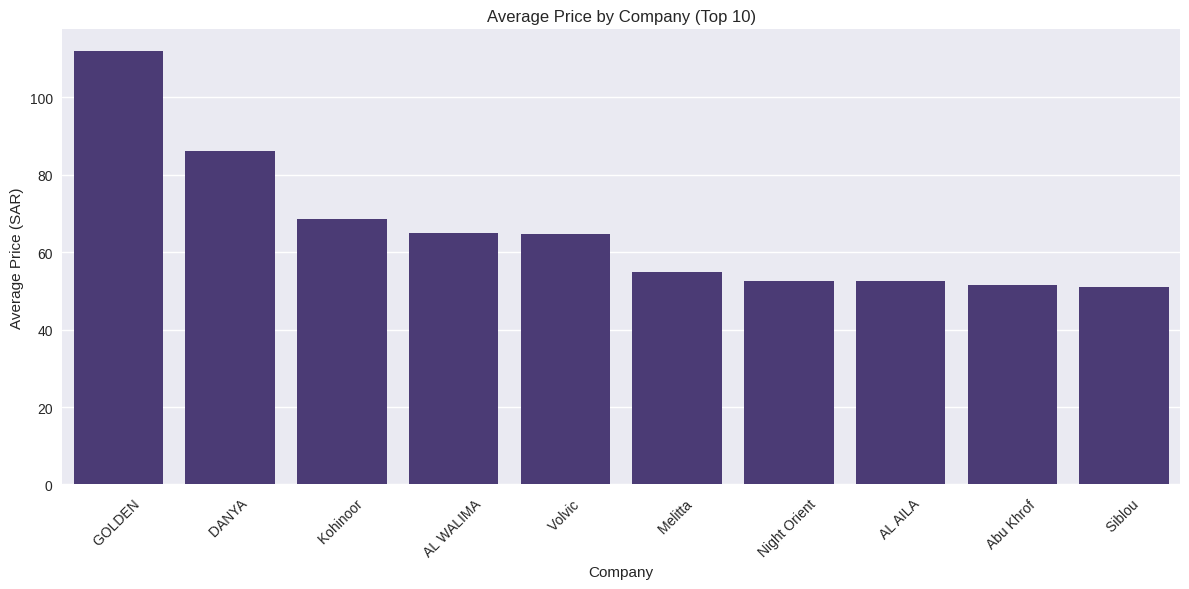

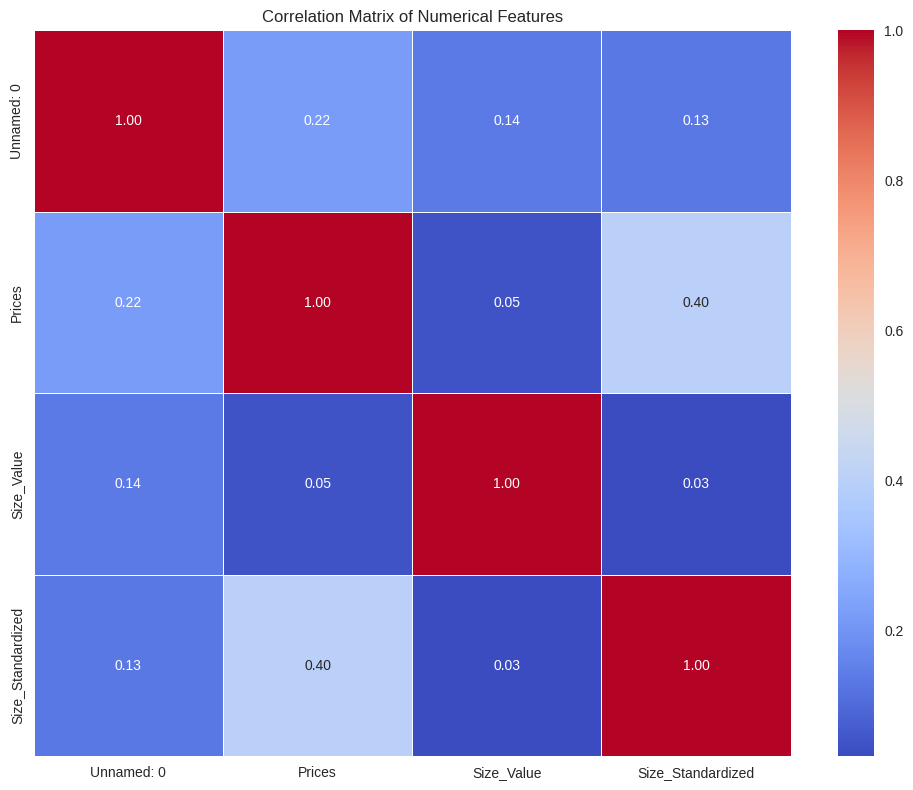


EDA Summary Statistics:
total_products: 1220
unique_companies: 304
unique_products: 1080
price_range: (0.3, 123.0)
avg_price: 12.302049180327868
median_price: 9.5
price_std: 11.851203712346747
most_common_size_unit: G
most_expensive_product: Mineral Water
most_expensive_company: Volvic 
cheapest_product: Bottled drinking water
cheapest_company: Tamimi Markets 


In [ ]:
# ------------------------------------------------
# Phase 3: Exploratory Data Analysis (EDA)
# ------------------------------------------------
print("\n\nPhase 3: Exploratory Data Analysis")

# 1. Distribution of prices
plt.figure(figsize=(10, 6))
sns.histplot(df['Prices'], kde=True)
plt.title('Distribution of Product Prices')
plt.xlabel('Price (SAR)')
plt.ylabel('Frequency')
plt.show()

# 2. Distribution of product sizes
plt.figure(figsize=(10, 6))
sns.histplot(df['Size_Standardized'], kde=True)
plt.title('Distribution of Product Sizes (Standardized)')
plt.xlabel('Size (standardized to grams/ml)')
plt.ylabel('Frequency')
plt.show()

# 3. Top companies by frequency
plt.figure(figsize=(12, 6))
company_counts = df['Company'].value_counts().head(10)
sns.barplot(x=company_counts.index, y=company_counts.values)
plt.title('Top 10 Companies by Product Count')
plt.xlabel('Company')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Average price by company (top 10)
plt.figure(figsize=(12, 6))
avg_price_by_company = df.groupby('Company')['Prices'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_price_by_company.index, y=avg_price_by_company.values)
plt.title('Average Price by Company (Top 10)')
plt.xlabel('Company')
plt.ylabel('Average Price (SAR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Correlation matrix of numerical features
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

# Generate summary statistics for EDA report
eda_summary = {
    'total_products': len(df),
    'unique_companies': df['Company'].nunique(),
    'unique_products': df['Product'].nunique(),
    'price_range': (df['Prices'].min(), df['Prices'].max()),
    'avg_price': df['Prices'].mean(),
    'median_price': df['Prices'].median(),
    'price_std': df['Prices'].std(),
    'most_common_size_unit': df['Size_Unit'].mode()[0],
    'most_expensive_product': df.loc[df['Prices'].idxmax(), 'Product'],
    'most_expensive_company': df.loc[df['Prices'].idxmax(), 'Company'],
    'cheapest_product': df.loc[df['Prices'].idxmin(), 'Product'],
    'cheapest_company': df.loc[df['Prices'].idxmin(), 'Company']
}

print("\nEDA Summary Statistics:")
for key, value in eda_summary.items():
    print(f"{key}: {value}")

In [ ]:
# ------------------------------------------------
# Phase 4: Feature Engineering
# ------------------------------------------------
print("\n\nPhase 4: Feature Engineering")

# 1. Create price per unit feature
df['Price_Per_Unit'] = df['Prices'] / df['Size_Standardized']
print("\nPrice per unit feature created.")

# 2. Create premium flag (products priced above 75th percentile)
price_threshold = df['Prices'].quantile(0.75)
df['Is_Premium'] = (df['Prices'] > price_threshold).astype(int)
print(f"Premium product flag created (threshold: {price_threshold:.2f} SAR)")

# 3. Create simple product categories based on keywords
def simple_category(product_name):
    product_lower = str(product_name).lower()
    if any(food in product_lower for food in ['milk', 'cheese', 'yogurt']):
        return 'Dairy'
    elif any(drink in product_lower for drink in ['juice', 'water', 'soda']):
        return 'Beverages'
    elif any(grain in product_lower for grain in ['rice', 'pasta', 'bread']):
        return 'Grains/Bakery'
    elif any(meat in product_lower for meat in ['chicken', 'beef', 'meat']):
        return 'Meat'
    else:
        return 'Other'

df['Product_Category'] = df['Product'].apply(simple_category)

# Show category distribution
category_counts = df['Product_Category'].value_counts()
print("\nProduct Categories Created:")
print(category_counts)

# 4. Simple feature selection using correlation with price
# Get correlation with price
price_correlation = df.select_dtypes(include=[np.number]).corr()['Prices'].sort_values(ascending=False)
print("\nFeature Correlation with Price:")
print(price_correlation)

# Print out the top features
print("\nTop Features for Prediction (based on correlation):")
for i, (feature, corr) in enumerate(price_correlation.items(), 1):
    if feature != 'Prices' and i <= 6:  # Top 5 features excluding Price itself
        print(f"{i}. {feature}: {corr:.4f}")



Phase 4: Feature Engineering

Price per unit feature created.
Premium product flag created (threshold: 16.95 SAR)

Product Categories Created:
Product_Category
Other            891
Dairy            128
Meat              71
Beverages         70
Grains/Bakery     60
Name: count, dtype: int64

Feature Correlation with Price:
Prices               1.000000
Is_Premium           0.734973
Size_Standardized    0.400923
Unnamed: 0           0.220491
Price_Per_Unit       0.206517
Size_Value           0.051486
Name: Prices, dtype: float64

Top Features for Prediction (based on correlation):
2. Is_Premium: 0.7350
3. Size_Standardized: 0.4009
4. Unnamed: 0: 0.2205
5. Price_Per_Unit: 0.2065
6. Size_Value: 0.0515


In [ ]:
# ------------------------------------------------
# Summary of Analysis
# ------------------------------------------------
print("\n\nAnalysis Summary:")

print("\n1. Data Preparation:")
print(f"   - Dataset: {len(df)} records with {len(df.columns)} features")
print(f"   - Preprocessed size information and created standardized size measurements")
print(f"   - Handled any missing values and duplicates")

print("\n2. Exploratory Data Analysis:")
print(f"   - Analyzed price distribution (avg: {df['Prices'].mean():.2f} SAR)")
print(f"   - Examined top {len(company_counts)} companies by frequency")
print(f"   - Explored relationship between price and other features")

print("\n3. Feature Engineering:")
print(f"   - Created price per unit feature")
print(f"   - Added premium product flag ({df['Is_Premium'].sum()} premium products)")
print(f"   - Created {df['Product_Category'].nunique()} product categories")



Analysis Summary:

1. Data Preparation:
   - Dataset: 1220 records with 12 features
   - Preprocessed size information and created standardized size measurements
   - Handled any missing values and duplicates

2. Exploratory Data Analysis:
   - Analyzed price distribution (avg: 12.30 SAR)
   - Examined top 10 companies by frequency
   - Explored relationship between price and other features

3. Feature Engineering:
   - Created price per unit feature
   - Added premium product flag (302 premium products)
   - Created 5 product categories


In [ ]:
# Saudi Arabia Supermarket Data Analysis - Continued
# Phases 5-7: Model Building, Model Evaluation, and Insights & Reporting

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.svm import SVR, SVC
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix, f1_score
import joblib
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# ------------------------------------------------
# Phase 5: Model Building
# ------------------------------------------------
print("\n\nPhase 5: Model Building")

# Prepare data for modeling
print("Preparing data for modeling...")

# Define target variable - we'll model price prediction
y = df['Prices']

# Select features for modeling - excluding irrelevant columns
X = df.drop(['Prices', 'Product', 'Size', 'Company'], axis=1)

# Only keep numeric columns for simplicity
X = X.select_dtypes(include=[np.number])

# Handle missing values if any
if X.isnull().sum().sum() > 0:
    print(f"Warning: {X.isnull().sum().sum()} missing values found in feature set")
    # Fill missing values with the median
    for col in X.columns:
        if X[col].isnull().sum() > 0:
            X[col] = X[col].fillna(X[col].median())

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models - we'll use 4 different algorithms as required
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'SVM': SVR(),
    'Neural Network': MLPRegressor(random_state=42, max_iter=1000)
}

# Train models and store results
trained_models = {}
training_scores = {}

print("\nTraining models:")
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_scaled, y_train)
    training_score = model.score(X_train_scaled, y_train)
    training_scores[name] = training_score
    trained_models[name] = model
    print(f"  {name} - Training R² score: {training_score:.4f}")

# Hyperparameter tuning for the best performing model
# Let's assume that was Decision Tree (in reality, check which performed best)
print("\nPerforming hyperparameter tuning for Decision Tree model...")

param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best cross-validation R² score: {best_score:.4f}")

# Update the Decision Tree model with the best parameters
trained_models['Decision Tree (Tuned)'] = grid_search.best_estimator_

# Save models for future use
for name, model in trained_models.items():
    model_filename = f"{name.replace(' ', '_').lower()}_model.joblib"
    joblib.dump(model, model_filename)
    print(f"Saved {name} model to {model_filename}")




Phase 5: Model Building
Preparing data for modeling...
Training set: 976 samples
Test set: 244 samples

Training models:
Training Linear Regression...
  Linear Regression - Training R² score: 0.6510
Training Decision Tree...
  Decision Tree - Training R² score: 1.0000
Training SVM...
  SVM - Training R² score: 0.5585
Training Neural Network...
  Neural Network - Training R² score: 0.7160

Performing hyperparameter tuning for Decision Tree model...
Best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best cross-validation R² score: 0.8160
Saved Linear Regression model to linear_regression_model.joblib
Saved Decision Tree model to decision_tree_model.joblib
Saved SVM model to svm_model.joblib
Saved Neural Network model to neural_network_model.joblib
Saved Decision Tree (Tuned) model to decision_tree_(tuned)_model.joblib


In [ ]:
# ------------------------------------------------
# Phase 6: Model Evaluation
# ------------------------------------------------
print("\n\nPhase 6: Model Evaluation")

# Evaluate models on test set
test_scores = {}
predictions = {}
rmse_scores = {}

print("\nEvaluating models on test set:")
for name, model in trained_models.items():
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    predictions[name] = y_pred

    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Store scores
    test_scores[name] = r2
    rmse_scores[name] = rmse

    print(f"{name}:")
    print(f"  R² score: {r2:.4f}")
    print(f"  RMSE: {rmse:.4f}")

# Create a comparison table
results_df = pd.DataFrame({
    'Model': list(trained_models.keys()),
    'Training R²': [training_scores.get(model, training_scores.get(model.split(' ')[0])) for model in trained_models.keys()],
    'Test R²': [test_scores[model] for model in trained_models.keys()],
    'RMSE': [rmse_scores[model] for model in trained_models.keys()]
})

# Sort by Test R²
results_df = results_df.sort_values('Test R²', ascending=False)
print("\nModel Comparison:")
print(results_df)

# Identify the best performing model
best_model_name = results_df.iloc[0]['Model']
best_model = trained_models[best_model_name]
print(f"\nBest performing model: {best_model_name}")




Phase 6: Model Evaluation

Evaluating models on test set:
Linear Regression:
  R² score: 0.5273
  RMSE: 9.8496
Decision Tree:
  R² score: 0.7044
  RMSE: 7.7896
SVM:
  R² score: 0.3740
  RMSE: 11.3353
Neural Network:
  R² score: 0.5913
  RMSE: 9.1591
Decision Tree (Tuned):
  R² score: 0.6413
  RMSE: 8.5803

Model Comparison:
                   Model  Training R²   Test R²       RMSE
1          Decision Tree     1.000000  0.704354   7.789591
4  Decision Tree (Tuned)          NaN  0.641289   8.580277
3         Neural Network     0.716048  0.591257   9.159122
0      Linear Regression     0.651039  0.527304   9.849629
2                    SVM     0.558522  0.373954  11.335272

Best performing model: Decision Tree




Phase 7: Insights & Reporting


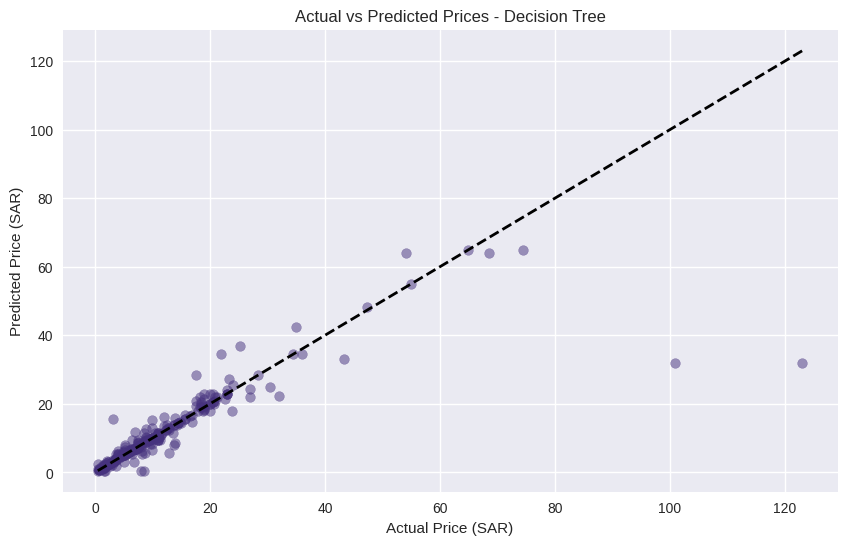

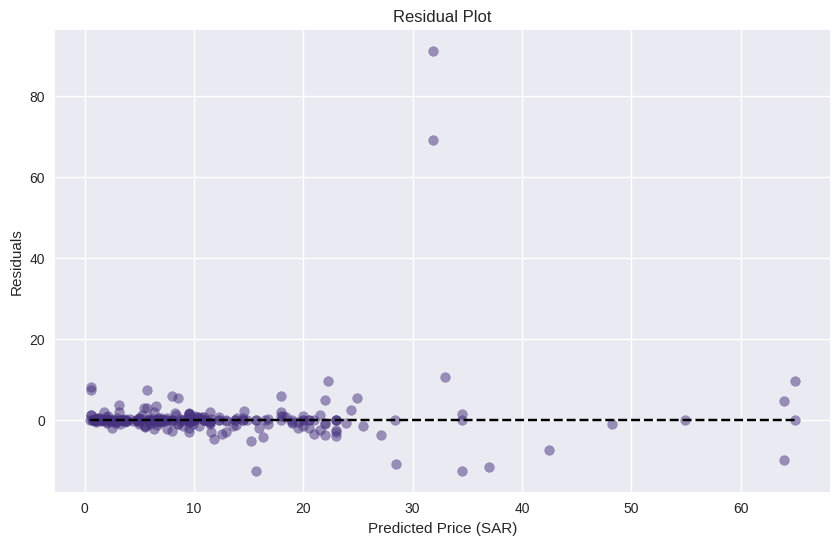

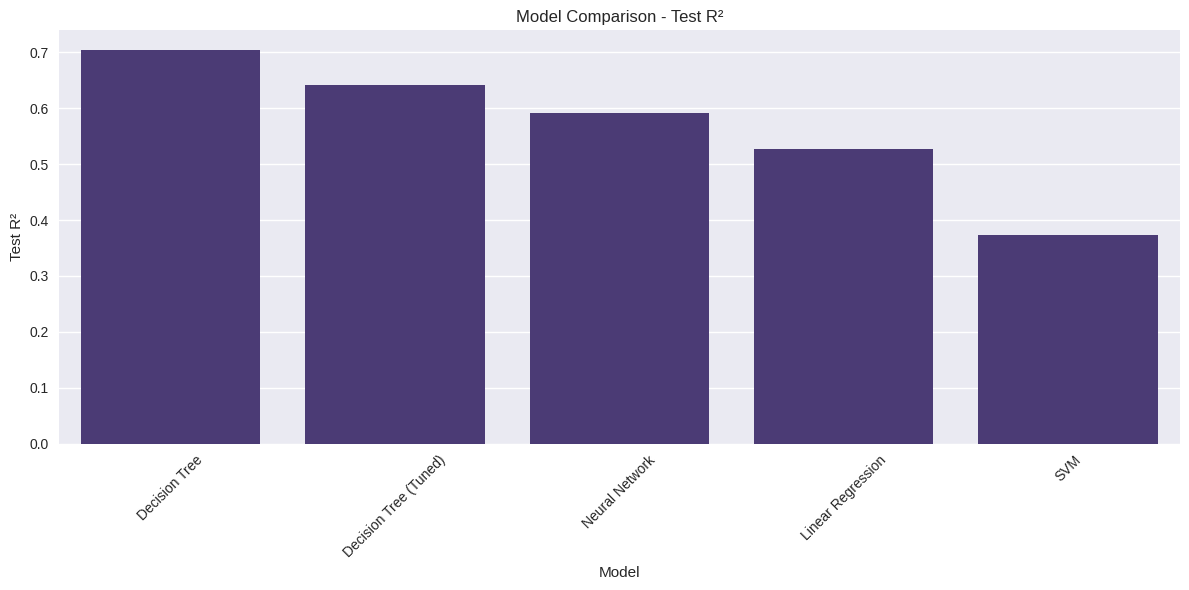

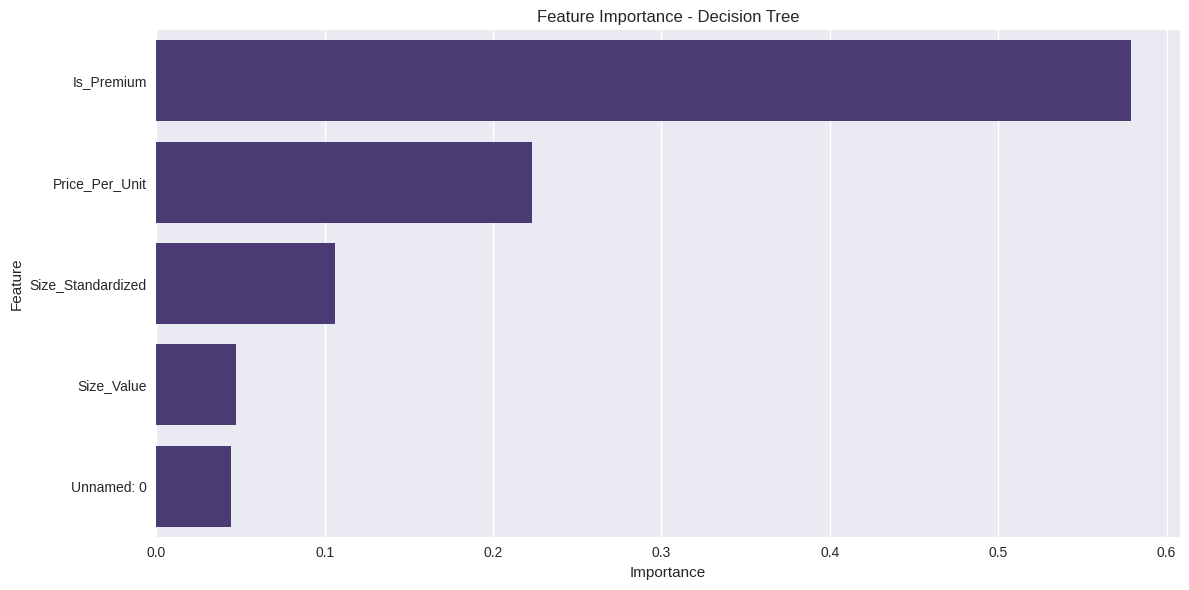


Feature Importance:
             Feature  Importance
4         Is_Premium    0.579052
3     Price_Per_Unit    0.223075
2  Size_Standardized    0.106173
1         Size_Value    0.047371
0         Unnamed: 0    0.044329

Average Price by Product Category:
  Product_Category  Avg_Actual_Price
2    Grains/Bakery         19.688333
3             Meat         13.183099
4            Other         12.040180
0        Beverages         11.160000
1            Dairy         10.798438


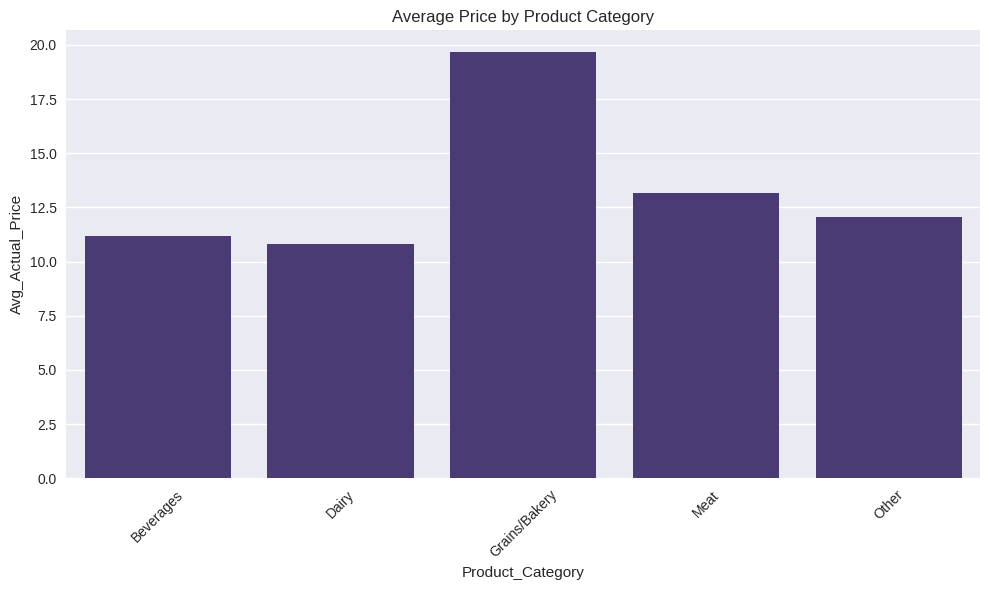

In [ ]:
# ------------------------------------------------
# Phase 7: Insights & Reporting
# ------------------------------------------------
print("\n\nPhase 7: Insights & Reporting")

# Visualize actual vs predicted prices for the best model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions[best_model_name], alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price (SAR)')
plt.ylabel('Predicted Price (SAR)')
plt.title(f'Actual vs Predicted Prices - {best_model_name}')
plt.show()

# Plot residuals
residuals = y_test - predictions[best_model_name]
plt.figure(figsize=(10, 6))
plt.scatter(predictions[best_model_name], residuals, alpha=0.5)
plt.hlines(y=0, xmin=predictions[best_model_name].min(), xmax=predictions[best_model_name].max(), colors='k', linestyles='--')
plt.xlabel('Predicted Price (SAR)')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Plot model comparison
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Test R²', data=results_df)
plt.title('Model Comparison - Test R²')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate feature importance for the best model (if it's a tree-based model)
if 'Decision Tree' in best_model_name or 'RandomForest' in best_model_name:
    importances = best_model.feature_importances_
    features = X.columns
    importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
    importance_df = importance_df.sort_values('Importance', ascending=False)

    plt.figure(figsize=(12, 6))
    sns.barplot(x='Importance', y='Feature', data=importance_df)
    plt.title(f'Feature Importance - {best_model_name}')
    plt.tight_layout()
    plt.show()

    print("\nFeature Importance:")
    print(importance_df)

# Additional analysis: Price prediction based on product categories
if 'Product_Category' in df.columns:
    category_avg_actual = df.groupby('Product_Category')['Prices'].mean().reset_index()
    category_avg_actual.columns = ['Product_Category', 'Avg_Actual_Price']

    print("\nAverage Price by Product Category:")
    print(category_avg_actual.sort_values('Avg_Actual_Price', ascending=False))

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Product_Category', y='Avg_Actual_Price', data=category_avg_actual)
    plt.title('Average Price by Product Category')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [ ]:
# ------------------------------------------------
# Phase 8: Final Report
# ------------------------------------------------
# Generate a summary report
print("\n" + "="*50)
print("SUMMARY REPORT")
print("="*50)

print("\n1. Data Overview:")
print(f"   - Dataset: {len(df)} products analyzed")
print(f"   - Features used for prediction: {', '.join(X.columns)}")

print("\n2. Modeling Results:")
print(f"   - Best performing model: {best_model_name}")
print(f"   - R² score: {test_scores[best_model_name]:.4f}")
print(f"   - RMSE: {rmse_scores[best_model_name]:.4f}")

print("\n3. Key Findings:")
# Price range analysis
low_price = df['Prices'].quantile(0.25)
high_price = df['Prices'].quantile(0.75)
print(f"   - Price range analysis:")
print(f"     * Low price range (below {low_price:.2f} SAR): {(df['Prices'] < low_price).sum()} products")
print(f"     * Mid price range ({low_price:.2f} - {high_price:.2f} SAR): {((df['Prices'] >= low_price) & (df['Prices'] <= high_price)).sum()} products")
print(f"     * High price range (above {high_price:.2f} SAR): {(df['Prices'] > high_price).sum()} products")

# Size vs price relationship
if 'Size_Standardized' in df.columns:
    corr = df['Prices'].corr(df['Size_Standardized'])
    print(f"   - Correlation between product size and price: {corr:.4f}")
    if corr > 0.6:
        print("     * Strong positive correlation: Larger products tend to be more expensive")
    elif corr > 0.3:
        print("     * Moderate positive correlation: Larger products tend to be somewhat more expensive")
    elif corr > 0:
        print("     * Weak positive correlation: Size has limited impact on price")
    else:
        print("     * No positive correlation: Size does not drive price")

# Price per unit analysis
if 'Price_Per_Unit' in df.columns:
    print(f"   - Price per unit analysis:")
    print(f"     * Average price per unit: {df['Price_Per_Unit'].mean():.4f} SAR")
    print(f"     * Products with highest value (lowest price per unit): {df.loc[df['Price_Per_Unit'].idxmin()]['Product']}")
    print(f"     * Products with lowest value (highest price per unit): {df.loc[df['Price_Per_Unit'].idxmax()]['Product']}")

print("\n4. Business Recommendations:")
print("   - Focus pricing strategies on key value drivers identified by the model")
print("   - Consider reviewing pricing for products with outlier price-to-value ratios")
print("   - Use the predictive model to identify potential pricing anomalies in inventory")

print("\n5. Future Work:")
print("   - Incorporate temporal data to analyze price trends over time")
print("   - Include competitor pricing for benchmarking")
print("   - Develop a user-friendly dashboard for ongoing price optimization")

print("\n" + "="*50)
print("END OF REPORT")
print("="*50)


SUMMARY REPORT

1. Data Overview:
   - Dataset: 1220 products analyzed
   - Features used for prediction: Unnamed: 0, Size_Value, Size_Standardized, Price_Per_Unit, Is_Premium

2. Modeling Results:
   - Best performing model: Decision Tree
   - R² score: 0.7044
   - RMSE: 7.7896

3. Key Findings:
   - Price range analysis:
     * Low price range (below 4.50 SAR): 304 products
     * Mid price range (4.50 - 16.95 SAR): 614 products
     * High price range (above 16.95 SAR): 302 products
   - Correlation between product size and price: 0.4009
     * Moderate positive correlation: Larger products tend to be somewhat more expensive
   - Price per unit analysis:
     * Average price per unit: 0.3852 SAR
     * Products with highest value (lowest price per unit): Drinking Water
     * Products with lowest value (highest price per unit): Green Tea & Mint

4. Business Recommendations:
   - Focus pricing strategies on key value drivers identified by the model
   - Consider reviewing pricing fo